In [353]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [354]:
#reading the values from the train dataset
data = pd.read_csv('train.csv')

## Exploratory Data Analysis and Imputation - Train Dataset
In this section we will be checking the dataset for missing values, outliers, shape of the dataset, type of distribution and we will be imputing the missing values to go ahead with further Machine Learning explorations

In [355]:
#checking the info of columns - data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 281 entries, Unnamed: 0 to class
dtypes: float64(116), int64(160), object(5)
memory usage: 878.2+ KB


In [356]:
#checking the shape of train dataset
data.shape

(400, 281)

In [357]:
#checking the target column
data.groupby('class').size()

class
1     214
2      39
3      13
4      12
5      13
6      23
7       3
8       2
9       8
10     48
14      4
15      2
16     19
dtype: int64

In [358]:
#checking how many null values are present in data - train dataset
data.isnull().sum()

Unnamed: 0       0
age              0
sex              0
height           0
weight           0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 281, dtype: int64

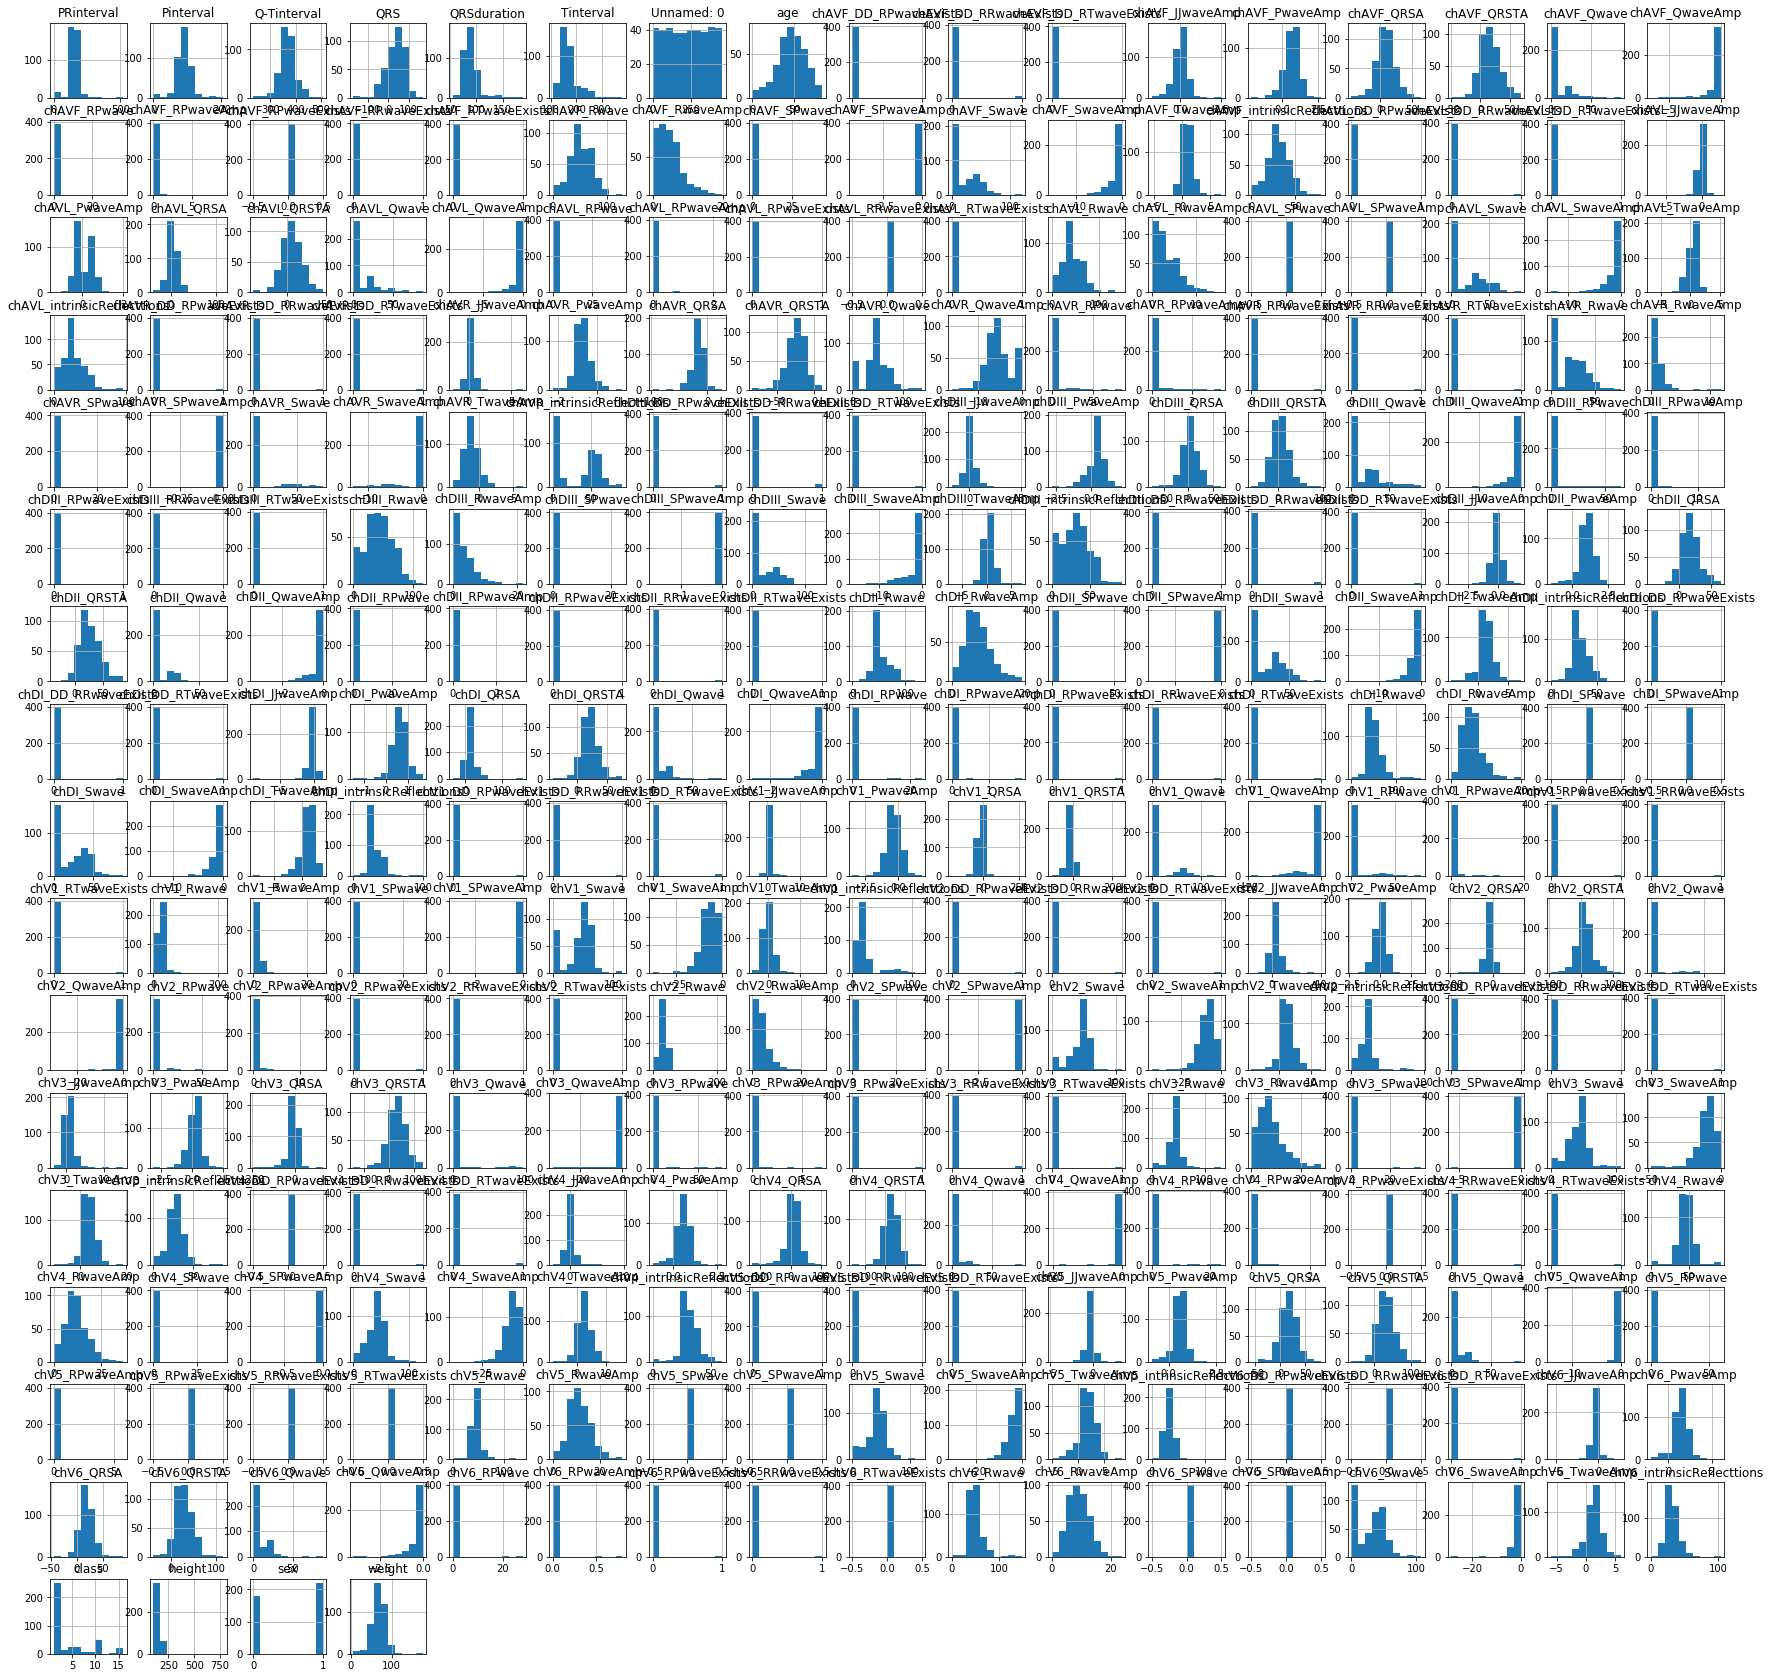

In [359]:
#checking the histogram of the train dataset for each seperate columns to find their distribution
data.hist(bins=10, figsize=(30, 30))
plt.show()

## Missing Data Imputation - Train Dataset

In [360]:
#Dropping first column as it has index or serial numbers
data=data.drop(['Unnamed: 0'],axis=1)

In [361]:
#Replacing "?" with NaN values
data = data.replace({"?":np.nan})

In [362]:
#Checking object data type in the dataset
data.describe(include = 'O')

,T,P,QRST,J,heartrate
count,393,383,399,67,399
unique,159,93,127,62,62
top,52,60,55,84,70
freq,13,21,9,3,19


In [363]:
#Converting Object datatype to Float or Int
data['T'] = data['T'].astype("Float64").astype("Int64")
data['P'] = data['P'].astype("Float64").astype("Int64")
data['QRST'] = data['QRST'].astype("Float64").astype("Int64")
data['J'] = data['J'].astype("Float64")
data['heartrate'] = data['heartrate'].astype("Float64").astype("Int64")

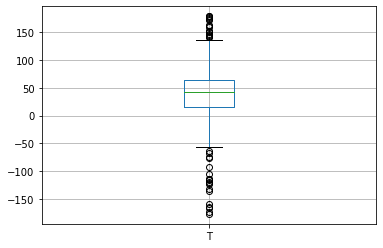

In [364]:
#Checking outliers for column T
data.boxplot(column = 'T')

In [365]:
#imputing column T with median - as it contains outliers as seen in the image above
data['T'] = data['T'].fillna((data['T'].median()))

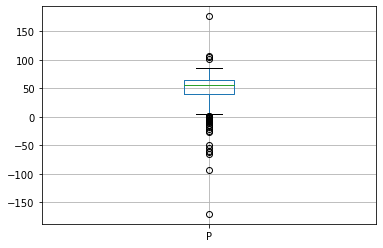

In [366]:
#Checking outliers for column P
data.boxplot(column = 'P')

In [367]:
#imputing column P with median - as it contains outliers as seen in the image above
data['P'] = data['P'].fillna((data['P'].median()))

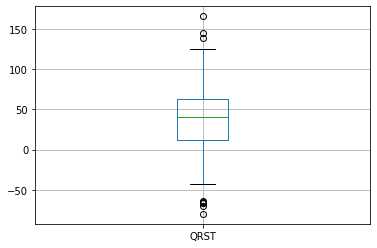

In [368]:
#Checking outliers for column QRST
data.boxplot(column = 'QRST')

In [369]:
#imputing column QRST with median - as it contains outliers as seen in the image above
data['QRST'] = data['QRST'].fillna((data['QRST'].median()))

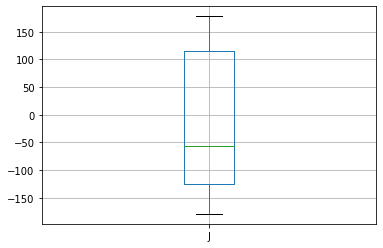

In [370]:
#Checking outliers for column J
data.boxplot(column = 'J')

In [371]:
#imputing column J with mean - as it does not contain outliers as seen in the image above
data['J'] = data['J'].fillna((data['J'].mean()))

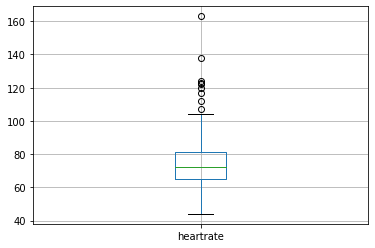

In [372]:
#Checking outliers for column heartrate
data.boxplot(column = 'heartrate')

In [373]:
#imputing column QRST with median - as it contains outliers as seen in the image above
data['heartrate'] = data['heartrate'].fillna((data['heartrate'].median()))

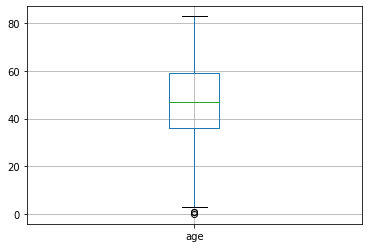

In [374]:
#Checking outliers for column age
data.boxplot(column = 'age')

In [375]:
#Checking median value of the column age
data['age'].median()

47.0

In [376]:
#Replacing 0 value from the column age with median value of the same column
data.loc[(data['age'] == 0), 'age'] = 47.0

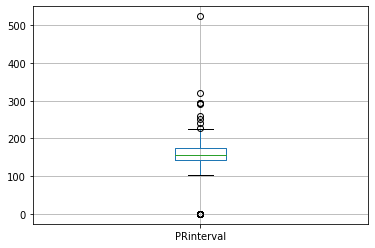

In [377]:
#Checking outliers for column PRinterval
data.boxplot(column = 'PRinterval')

In [378]:
#Checking mean value of the column PRinterval
data['PRinterval'].median()

157.0

In [379]:
#Replacing 0 value from the column PRinterval with mean value of the same column
data.loc[(data['PRinterval'] == 0), 'PRinterval'] = 157.0

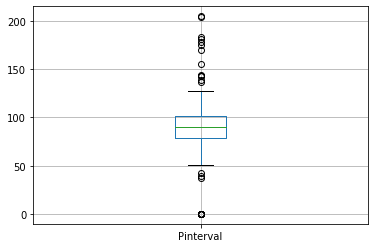

In [380]:
#Checking outliers for column Pinterval
data.boxplot(column = 'Pinterval')

In [381]:
#Checking median value of the column PRinterval
data['Pinterval'].median()

90.5

In [382]:
#Replacing 0 value from the column Pinterval with median value of the same column
data.loc[(data['Pinterval'] == 0), 'Pinterval'] = 91.0

In [383]:
data.shape

(400, 280)

## Exploratory Data Analysis and Imputation - Test Dataset
In this section we will be checking the dataset for missing values, outliers, shape of the dataset, type of distribution and we will be imputing the missing values to go ahead with further Machine Learning explorations

In [384]:
#reading the values from the test dataset
test = pd.read_csv('test.csv')

In [385]:
#checking the info of columns - test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 280 entries, Unnamed: 0 to chV6_QRSTA
dtypes: float64(106), int64(171), object(3)
memory usage: 113.9+ KB


In [386]:
#checking the shape of test dataset
test.shape

(52, 280)

In [387]:
#checking how many null values are present in data - test dataset
test.isnull().sum()

Unnamed: 0        0
age               0
sex               0
height            0
weight            0
                 ..
chV6_SPwaveAmp    0
chV6_PwaveAmp     0
chV6_TwaveAmp     0
chV6_QRSA         0
chV6_QRSTA        0
Length: 280, dtype: int64

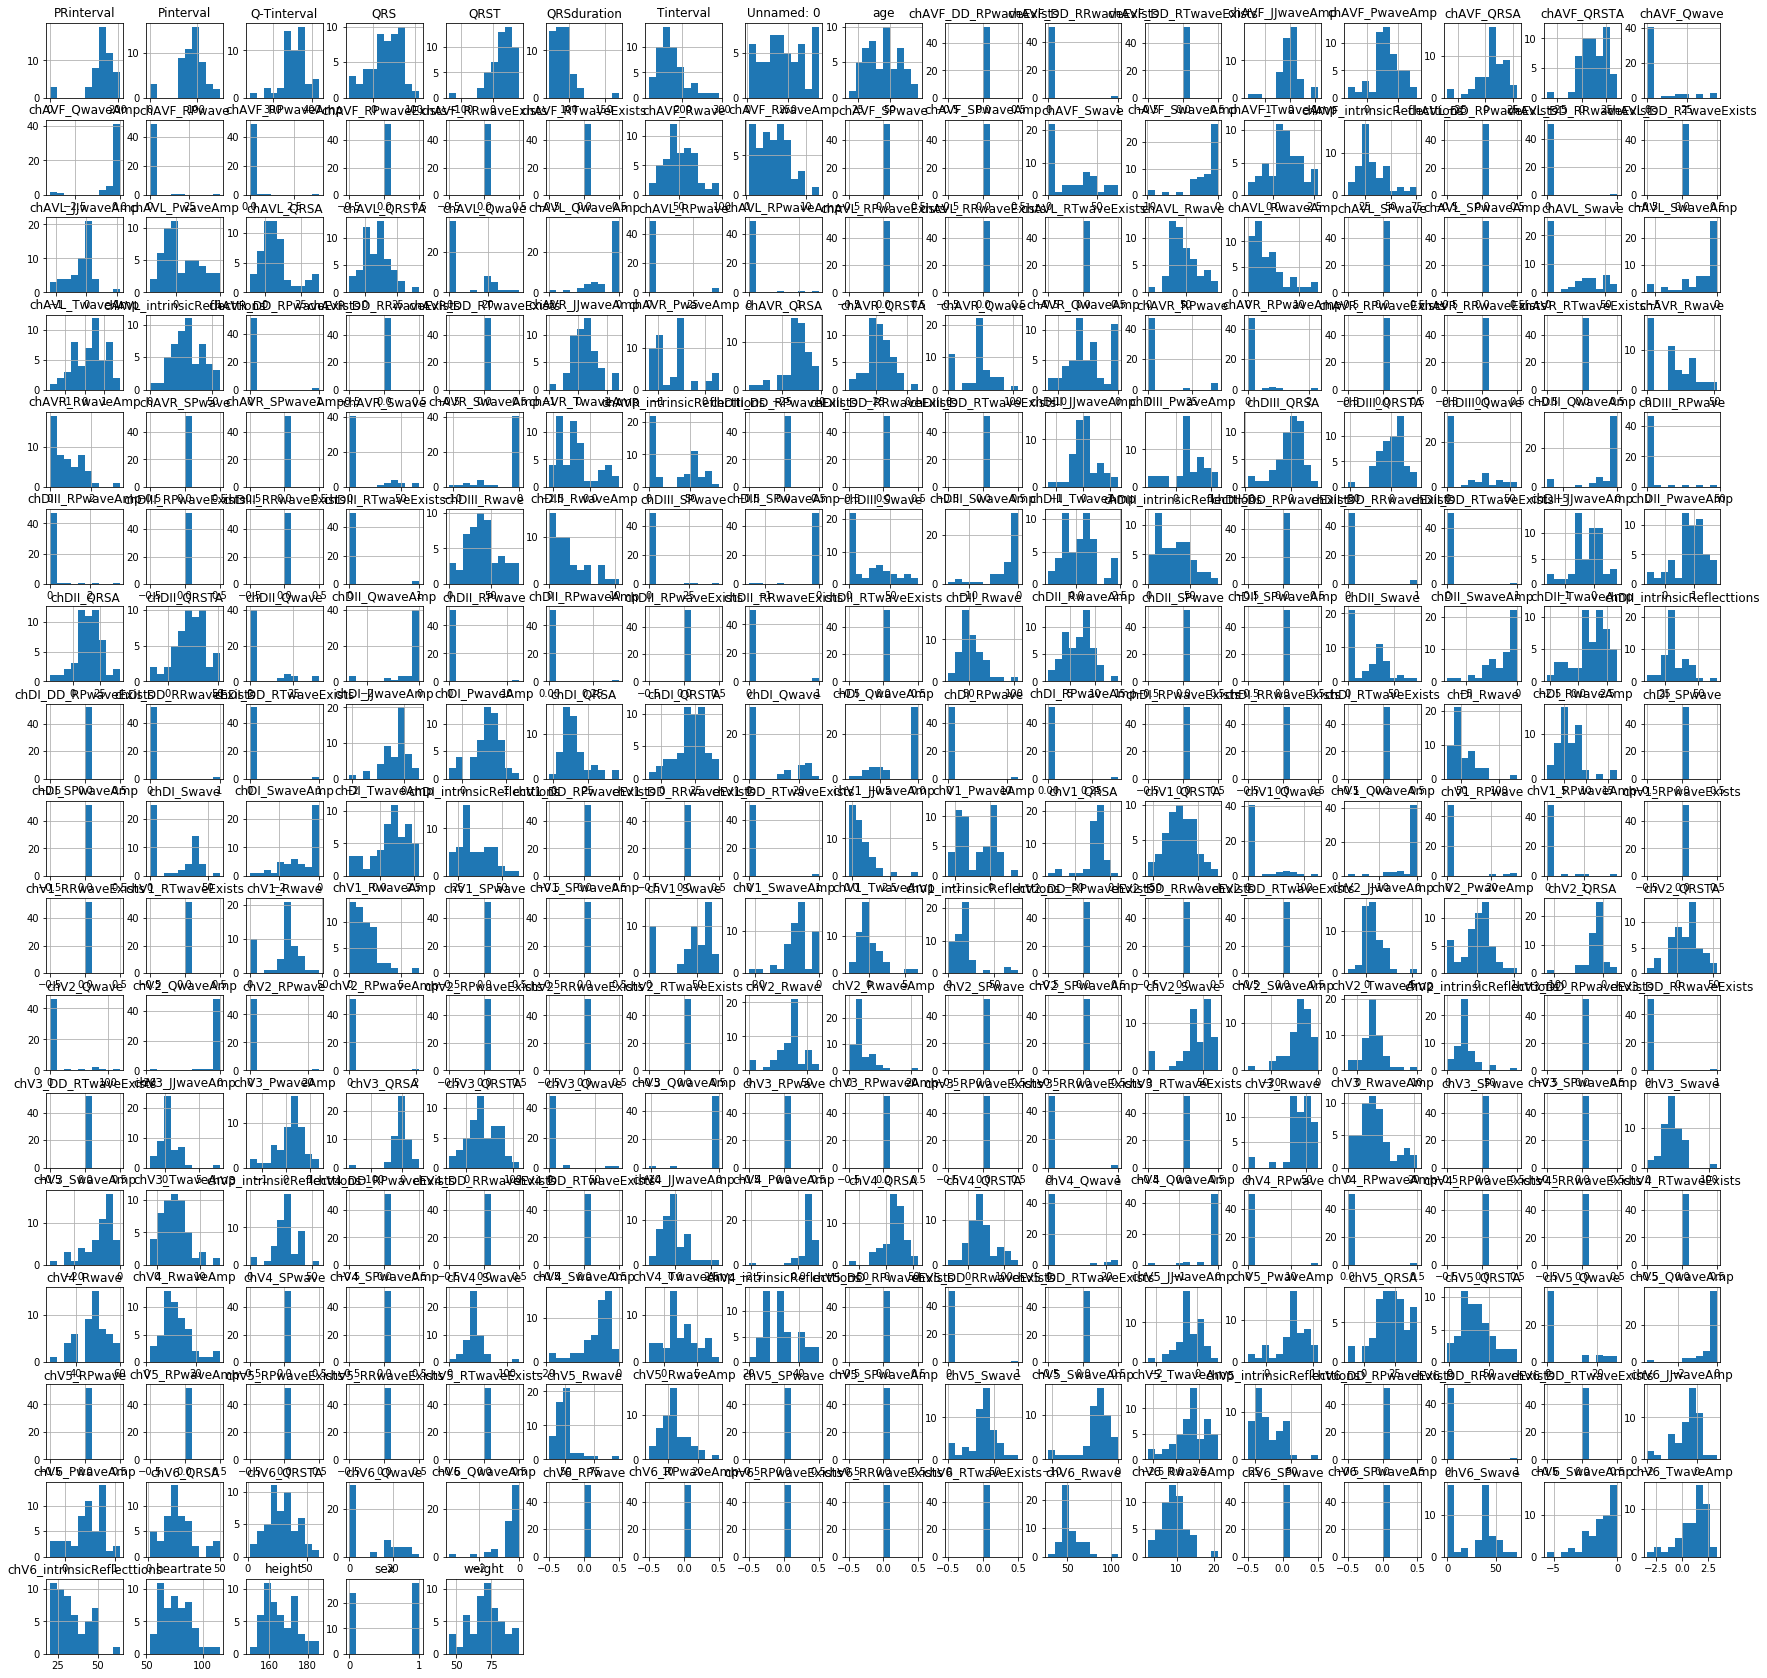

In [388]:
#checking the histogram of the test dataset for each seperate columns to find their distribution
test.hist(bins=10, figsize=(30, 30))
plt.show()

## Missing Data Imputation - Test Dataset

In [389]:
#Dropping first column as it has index or serial numbers
test=test.drop(['Unnamed: 0'],axis=1)

In [390]:
#Replacing "?" with NaN values
test = test.replace({"?":np.nan})

In [391]:
#Checking object data type in the dataset
test.describe(include = 'O')

,T,P,J
count,51,47,9
unique,44,33,9
top,56,70,-162
freq,3,3,1


In [392]:
#Converting Object datatype to Float or Int
test['T'] = test['T'].astype("Float64").astype("Int64")
test['P'] = test['P'].astype("Float64").astype("Int64")
test['J'] = test['J'].astype("Float64")

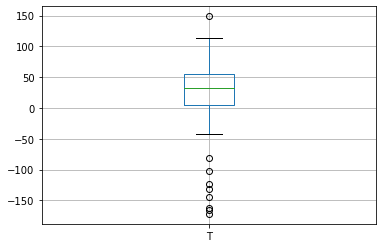

In [393]:
#Checking outliers for column T
test.boxplot(column = 'T')

In [394]:
#imputing column T with median - as it contains outliers as seen in the image above
test['T'] = test['T'].fillna((test['T'].median()))

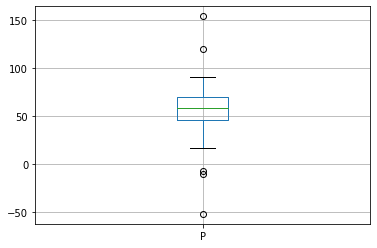

In [395]:
#Checking outliers for column P
test.boxplot(column = 'P')

In [396]:
#imputing column P with median - as it contains outliers as seen in the image above
test['P'] = test['P'].fillna((test['P'].median()))

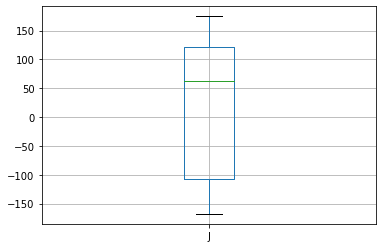

In [397]:
#Checking outliers for column J
test.boxplot(column = 'J')

In [398]:
#imputing column J with mean - as it does not contain outliers as seen in the image above
test['J'] = test['J'].fillna((test['J'].mean()))

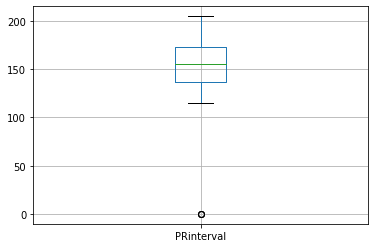

In [399]:
#Checking outliers for column PRinterval
test.boxplot(column = 'PRinterval')

In [400]:
#Checking mean value of the column PRinterval
test['PRinterval'].mean()

148.98076923076923

In [401]:
#Replacing 0 value from the column PRinterval with mean value of the same column
test.loc[(test['PRinterval'] == 0), 'PRinterval'] = 149.0

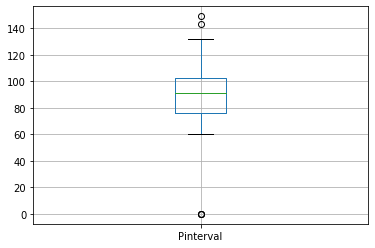

In [402]:
#Checking outliers for column Pinterval
test.boxplot(column = 'Pinterval')

In [403]:
#Checking median value of the column Pinterval
test['Pinterval'].median()

91.5

In [404]:
#Replacing 0 value from the column Pinterval with median value of the same column
test.loc[(test['Pinterval'] == 0), 'Pinterval'] = 92.0

In [405]:
test.shape

(52, 279)

## Splitting the data

In [484]:
X=data.drop(['class'],axis=1)
y = pd.DataFrame(data['class'])

In [485]:
#we are using the default split with random_state = 0 and also we use Standard Scaler with
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

## Scaling the Data
We used Standard scaling as features in the dataset had outliers; all the features were normalized to unit variance for better estimation of the various machine learning algorithms utilized in the project

In [486]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
test_scaling = scaler.transform(test)

## Model 1 -  K Neighbors Classifier

In [487]:
#Here we are running K Nearest Neigbors for K values(1-20) through a for loop 

from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

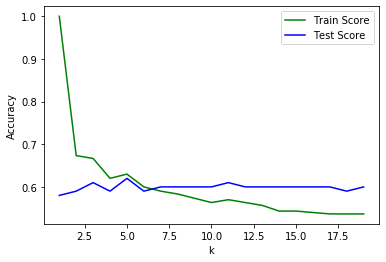

In [488]:
#plotting the explorations in a graph to find exact rise for test

x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [489]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(1,20)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv= 15, return_train_score=True)
grid_knn.fit(X_train, y_train)

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)
print()
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
train_score=grid_knn.score(X_train,y_train)
test_score=grid_knn.score(X_test,y_test)

print('KNN_train_score=',train_score)
print('KNN_test_score=',test_score)

KNN parameters:  {'n_neighbors': 3}

Best Mean Cross-validation score: 0.59
KNN_train_score= 0.6666666666666666
KNN_test_score= 0.61


In [490]:
#predicting the target values for test dataset - knn
test_predict_knn=grid_knn.predict(test_scaling)
print(test_predict_knn)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [491]:
import collections
knn_coll = np.array(test_predict_knn)
collections.Counter(knn_coll)

Counter({1: 50, 4: 2})

### We observed that K Nearest Neighbors has best mean cross validation score is 59 percent, train and test score is 66 and 61 percent respectively.However, when we notice the predicted values it only predicted one class which is a biased estimation.

## Model 2 - Logistic Regression

In [492]:
#Logistic Regression - solving with library liblinear that was found out as default through research

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

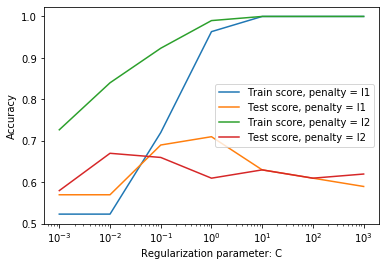

In [493]:
#plotting the C values vs accuracy graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [494]:
log = LogisticRegression(random_state=0)
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1', 'l2']}


grid_log = GridSearchCV(log, param_log,return_train_score=True,cv=15)
grid_log.fit(X_train, y_train)
print('Logistic parameters: ', grid_log.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))
train_score=grid_log.score(X_train,y_train)
test_score=grid_log.score(X_test,y_test)

print('Logreg_train_score=',train_score)
print('Logreg_test_score=',test_score)

Logistic parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.69
Logreg_train_score= 0.96
Logreg_test_score= 0.71


In [495]:
#predicting the target values for test dataset - logistic regression
test_predict_log=grid_log.predict(test_scaling)
print(test_predict_log)

[10  1  1  1  6  1  1  1  4  9  2  1  1  1  1  1  1  1  1  1  1  4  1  2
  1  1  2  1  1  2  1  4  1  1  3  1  1  1  2  1  1 10  1  2  1  1  1 16
  2  1  1  1]


In [496]:
import collections
logreg_coll = np.array(test_predict_log)
collections.Counter(logreg_coll)

Counter({10: 2, 1: 36, 6: 1, 4: 3, 9: 1, 2: 7, 3: 1, 16: 1})

### We observed that Logistic Regression has best mean cross validation score of 68 percent, train and test score comes out to be 96 and 71 percent respectively.It indicates that it has overfit the estimation.Morever, when we notice the predicted values it has predicted multiple classes which is an fair estimation on the test dataset.

## Model 3 - Decision Tree Classifier

In [497]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)

print('train_score=',train_score)
print('test_score=',test_score)

train_score= 1.0
test_score= 0.65


In [498]:
#define a list of parameters
param_dtree = {'max_depth': range(1,20),
              'splitter':["best","random"],
              'criterion':["gini","entropy"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=15, return_train_score = True)
grid_dtree.fit(X_train, y_train)

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))

train_score=grid_dtree.score(X_train,y_train)
test_score=grid_dtree.score(X_test,y_test)

# train and test score
print('DTree_train_score=',train_score)
print('Dtree_test_score=',test_score)

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Best Mean Cross-validation score: 0.67
DTree_train_score= 0.76
Dtree_test_score= 0.69


In [499]:
#predicting the target values for test dataset - Decision Tree
test_predict_dtree=grid_dtree.predict(test_scaling)
print(test_predict_dtree)

[10  1  1  1  1  1  1  1  4 16  2  1  1  1  1 10  1  1  1  1  1  4  1  4
  1  1  2  1  1  2  1  4  1  1  3  1  1  1  4  1  1 10  1  2  1  2  1  9
 10  1  1  1]


In [500]:
import collections
dtree_coll = np.array(test_predict_dtree)
collections.Counter(dtree_coll)

Counter({10: 4, 1: 35, 4: 5, 16: 1, 2: 5, 3: 1, 9: 1})

### We observed that Decision Tree Classifier has best mean cross validation score is 67 percent, train and test score is 76 and 69 percent respectively.However, when we notice the  predicted values it predicted multiple classes which depicts a fair classification.

## Model 4 - Linear Support Vector Machine Classifier

In [501]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0)
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'penalty':['l1', 'l2']}
grid_svc = GridSearchCV(svc, param_svc, cv =10, return_train_score=True)
grid_svc.fit(X_train, y_train)
print('SVC parameters: ', grid_svc.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc.best_score_))
train_score=grid_svc.score(X_train,y_train)
test_score=grid_svc.score(X_test,y_test)

print('Linear_SVC_train_score=',train_score)
print('Linear_SVC_test_score=',test_score)

SVC parameters:  {'C': 0.001, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.68
Linear_SVC_train_score= 0.8366666666666667
Linear_SVC_test_score= 0.67


In [502]:
#predicting the target values for test dataset - Linear SVC
test_predict_svc=grid_svc.predict(test_scaling)
print(test_predict_svc)

[10  9  1  1  6  1  1  1  4  9  2  1  1  1  1  1  1  1  1  2  1  4  1  5
  1 10  2  1  1  2  1  4  1  1  3  4  1  1  2  1  2 10  1  2  1  3  1 16
  2  1  1  1]


In [503]:
import collections
svc_coll = np.array(test_predict_svc)
collections.Counter(svc_coll)

Counter({10: 3, 9: 2, 1: 30, 6: 1, 4: 4, 2: 8, 5: 1, 3: 2, 16: 1})

### We observed that Linear Support Vector Machine Classifier has best mean cross validation score is 68 percent, train and test score is 83 and 67 percent respectively.However, when we notice the  predicted values it predicted multiple classes which denotes a fair classification.

## Model 5 - Support Vector Machine Classifier

### Linear kernel with GridSearch Cross Validation

In [504]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['linear']}
grid_svckl = GridSearchCV(svc, param_svc,return_train_score=True, cv=5)
grid_svckl.fit(X_train, y_train)

print('SVC parameters: ', grid_svckl.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckl.best_score_))
train_score=grid_svckl.score(X_train,y_train)
test_score=grid_svckl.score(X_test,y_test)

print('Linear_kernel_SVC_train_score=',train_score)
print('Linear_kernel_SVC test_score=',test_score)

SVC parameters:  {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best Mean Cross-validation score: 0.71
Linear_kernel_SVC_train_score= 0.8533333333333334
Linear_kernel_SVC test_score= 0.74


In [505]:
#predicting the target values for test dataset - Linear kernel SVC
final_test_prediction=grid_svckl.predict(test_scaling)
print(final_test_prediction)

[10  1  1  1  6  1  1  1  4  9  1  1  1  1  1  1  1  1  1  1  1  4  1  2
  1 10  2  1  1  2  1  4  1  1  3  1  1  1  2  1  1 10  1  2  1  3  1 16
  2  1  1  1]


In [506]:
import collections
final_test_prediction_linearksvc_coll = np.array(final_test_prediction)
collections.Counter(final_test_prediction_linearksvc_coll)

Counter({10: 3, 1: 35, 6: 1, 4: 3, 9: 1, 2: 6, 3: 2, 16: 1})

### We observed that Linear kernel with GridSearch Cross Validation has best mean cross validation score is 71 percent, train and test score is 85 and 74 percent respectively.However, when we notice the  predicted values it predicted multiple classes which denotes a fair classification.

### Poly kernel with GridSearch Cross Validation

In [507]:
svc = SVC(random_state=0)

param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['poly']}
grid_svckp = GridSearchCV(svc, param_svc,return_train_score=True,cv=15)
grid_svckp.fit(X_train, y_train)

print('SVC parameters: ', grid_svckp.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckp.best_score_))
train_score=grid_svckp.score(X_train,y_train)
test_score=grid_svckp.score(X_test,y_test)

print('Poly_SVC_train_score=',train_score)
print('Poly_SVC_test _score=',test_score)

SVC parameters:  {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
Best Mean Cross-validation score: 0.60
Poly_SVC_train_score= 1.0
Poly_SVC_test _score= 0.65


In [508]:
#predicting the target values for test dataset - Poly kernel SVC
test_predict_svckp=grid_svckp.predict(test_scaling)
print(test_predict_svckp)

[1 1 1 1 1 1 1 1 4 9 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 2 1 1 1 1 4 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1]


In [509]:
import collections
polyksvc_coll = np.array(test_predict_svckp)
collections.Counter(polyksvc_coll)

Counter({1: 45, 4: 3, 9: 1, 2: 3})

### We observed that Polynomial kernel with GridSearch Cross Validation has best mean cross validation score is 60 percent, train and test score is 100 and 65 percent respectively.However, when we notice the  predicted values it predicted similar classes which denotes a biased classification.

### Rbf kernel with GridSearch Cross Validation

In [510]:
svc = SVC(random_state=0)
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['rbf']}
grid_svckr = GridSearchCV(svc, param_svc,return_train_score=True,cv=5)
grid_svckr.fit(X_train, y_train)

print('SVC parameters: ', grid_svckr.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckr.best_score_))
train_score=grid_svckr.score(X_train,y_train)
test_score=grid_svckr.score(X_test,y_test)

print('Rbf_SVC_train_score=',train_score)
print('Rbf_SVC_test_score=',test_score)

SVC parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean Cross-validation score: 0.70
Rbf_SVC_train_score= 0.9166666666666666
Rbf_SVC_test_score= 0.67


In [511]:
#predicting the target values for test dataset - Rbf kernel SVC
test_predict_svckr=grid_svckr.predict(test_scaling)
print(test_predict_svckr)

[10  2  1  1  6  1  1  1  4  9  1  1  1  1  1  1  1  1  1  1  1  4  1  2
  1 10  2  1  1  2  1  4  1  1  3  1  1  1  2  1  1 10  1  2  1  3  1 16
  2  1  1  1]


In [512]:
import collections
rbfksvc_coll = np.array(test_predict_svckr)
collections.Counter(rbfksvc_coll)

Counter({10: 3, 2: 7, 1: 34, 6: 1, 4: 3, 9: 1, 3: 2, 16: 1})

### We observed that RBF kernel with GridSearch Cross Validation has best mean cross validation score is 71 percent, train and test score is 91 and 67 percent respectively.However, when we notice the  predicted values it predicted disparate classes which denotes a unbiased classification.

## Model 6 - Random Forest Classifier

In [513]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': np.arange(1, 20)}
grid_rforest = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_rforest.fit(X_train, y_train)
print("Best parameters: {}".format(grid_rforest.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rforest.best_score_))
train_score=grid_rforest.score(X_train,y_train)
test_score=grid_rforest.score(X_test,y_test)

print('Random_forest_train_score=',train_score)
print('Random_forest_test_score=',test_score)

Best parameters: {'max_depth': 13}
Best cross-validation score: 0.72
Random_forest_train_score= 0.9833333333333333
Random_forest_test_score= 0.73


In [514]:
#predicting the target values for test dataset - Random Forest
test_predict_rforest=grid_rforest.predict(test_scaling)
print(test_predict_rforest)

[10  1  1  1  1  1  1  1  4  9  1  1  1  1  1  1  1  1  1  1  1  4  1  2
  1  1  2  1  1  2  1  4  1  1  3  1  1  1  2  1  1 10  1  2  1  3  1  1
  2  1  1  1]


In [515]:
import collections
rforest_coll = np.array(test_predict_rforest)
collections.Counter(rforest_coll)

Counter({10: 2, 1: 38, 4: 3, 9: 1, 2: 6, 3: 2})

### We observed that Random Forest Classifier has best mean cross validation score is 72 percent, train and test score is 98 and 73 percent respectively.However, when we notice the  predicted values it predicted almost classes which denotes a unbiased classification.

## Best Algorithm Selection - Before PCA

In [516]:
Model_Before_PCA=["KNN","Decision Tree Classifier","Logistic Regression","Linear SVM","SVM RBF Kernel",
       "SVM Linear Kernel","SVM Poly Kernel", "Random Forest"]
X_train_score_accuracy=[grid_knn.score(X_train,y_train),grid_dtree.score(X_train,y_train),grid_log.score(X_train,y_train),
                        grid_svc.score(X_train,y_train),grid_svckr.score(X_train,y_train),grid_svckl.score(X_train,y_train),
                        grid_svckp.score(X_train,y_train),grid_rforest.score(X_train,y_train)]
X_test_score_accuracy=[grid_knn.score(X_test,y_test),grid_dtree.score(X_test,y_test),grid_log.score(X_test,y_test),
                       grid_svc.score(X_test,y_test),grid_svckr.score(X_test,y_test),grid_svckl.score(X_test,y_test),
                       grid_svckp.score(X_test,y_test), grid_rforest.score(X_test,y_test)]

gh = {"Model Before PCA":Model_Before_PCA,"Train Accuracy":X_train_score_accuracy,"Test accuracy":X_test_score_accuracy}

In [517]:
accuracy_score = pd.DataFrame(gh)
#accuracy_score.sort_values(by=['Test accuracy'],inplace=True,ascending=False)
accuracy_score

,Model Before PCA,Train Accuracy,Test accuracy
0,KNN,0.666667,0.61
1,Decision Tree Classifier,0.760000,0.69
2,Logistic Regression,0.960000,0.71
3,Linear SVM,0.836667,0.67
4,SVM RBF Kernel,0.916667,0.67
5,SVM Linear Kernel,0.853333,0.74
6,SVM Poly Kernel,1.000000,0.65
7,Random Forest,0.983333,0.73


## According to the above table, SVM Linear Kernel algorithm performs well when compare to the other models also the difference between train and test accuracies are low. Therefore, our best model before PCA is SVM Linear Kernel.

## PCA

In [446]:
from sklearn.decomposition import PCA
import numpy as np

#Make an instance of the Model
pca = PCA(n_components=0.99)

In [447]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
test_scaling = pca.transform(test)

In [448]:
np.sum(pca.explained_variance_ratio_)

0.990375335390103

In [449]:
pca.n_components_

133

## Model 1 -  K Neighbors Classifier

In [450]:
#Here we are running K Nearest Neigbors for K values(1-20) through a for loop 

from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

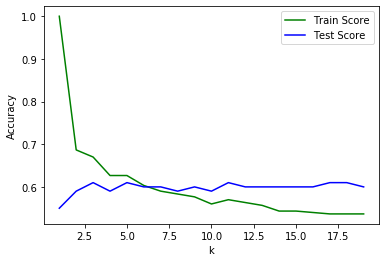

In [451]:
#plotting the explorations in a graph to find exact rise for test

x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [452]:
param_knn = {'n_neighbors': range(1,20)}

#apply grid search
grid_knn1 = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn1.fit(X_train, y_train)

#find best parameters
print('KNN parameters: ', grid_knn1.best_params_)
print()
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn1.best_score_))
train_score=grid_knn1.score(X_train,y_train)
test_score=grid_knn1.score(X_test,y_test)

print('KNN_train_score=',train_score)
print('KNN_test_score=',test_score)

KNN parameters:  {'n_neighbors': 3}

Best Mean Cross-validation score: 0.58
KNN_train_score= 0.67
KNN_test_score= 0.61


In [453]:
#predicting the target values for test dataset - knn
test_predict_knn=grid_knn1.predict(test_scaling)
print(test_predict_knn)

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 1 1 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 1 9 9 9 9 9 9 9 9 9]


In [454]:
import collections
knn_coll = np.array(test_predict_knn)
collections.Counter(knn_coll)

Counter({9: 49, 1: 3})

### We observed that K Nearest Neighbors has train and test score is 67 and 61 percent respectively.However, when we notice the predicted values it only predicted one class which is a biased estimation.

## Model 2 - Logistic Regression

In [455]:
#Logistic Regression - solving with library liblinear that was found out as default through research

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

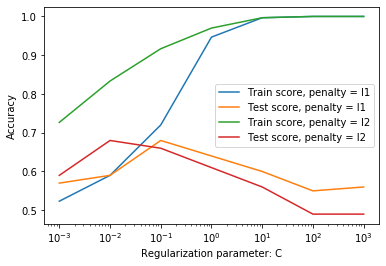

In [456]:
#plotting the C values vs accuracy graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [457]:
log = LogisticRegression(random_state=0)
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1', 'l2']}


grid_log1 = GridSearchCV(log, param_log,return_train_score=True,cv=5)
grid_log1.fit(X_train, y_train)
print('Logistic parameters: ', grid_log1.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_log1.best_score_))
train_score=grid_log1.score(X_train,y_train)
test_score=grid_log1.score(X_test,y_test)

print('Logreg_train_score=',train_score)
print('Logreg_test_score=',test_score)

Logistic parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.68
Logreg_train_score= 0.9466666666666667
Logreg_test_score= 0.67


In [458]:
#predicting the target values for test dataset - logistic regression
test_predict_log=grid_log1.predict(test_scaling)
print(test_predict_log)

[9 9 9 9 6 9 6 9 9 9 9 6 9 9 9 9 6 6 9 9 9 9 9 2 9 6 2 9 6 9 9 9 9 9 9 2 9
 9 2 9 2 9 9 2 9 9 9 9 2 9 9 9]


In [459]:
import collections
logreg_coll = np.array(test_predict_log)
collections.Counter(logreg_coll)

Counter({9: 38, 6: 7, 2: 7})

### We observed that Logistic Regression train and test score comes out to be 94 and 67 percent respectively.It indicates that it has overfit the estimation.However, when we notice the  predicted values it predicted similar classes which denotes a biased classification.

## Model 3 - Decision Tree Classifier

In [460]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)

print('train_score=',train_score)
print('test_score=',test_score)

train_score= 1.0
test_score= 0.43


In [461]:
#define a list of parameters
param_dtree = {'max_depth': range(1,20),
              'splitter':["best","random"],
              'criterion':["gini","entropy"]}

#apply grid search
grid_dtree1 = GridSearchCV(dtree, param_dtree, cv=3, return_train_score = True)
grid_dtree1.fit(X_train, y_train)

#find best parameters
print('Decision Tree parameters: ', grid_dtree1.best_params_)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree1.best_score_))

train_score=grid_dtree1.score(X_train,y_train)
test_score=grid_dtree1.score(X_test,y_test)

# train and test score
print('DTree_train_score=',train_score)
print('Dtree_test_score=',test_score)

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
Best Mean Cross-validation score: 0.56
DTree_train_score= 0.6333333333333333
Dtree_test_score= 0.64


In [462]:
#predicting the target values for test dataset - Decision Tree
test_predict_dtree=grid_dtree1.predict(test_scaling)
print(test_predict_dtree)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [463]:
import collections
dtree_coll = np.array(test_predict_dtree)
collections.Counter(dtree_coll)

Counter({2: 52})

### We observed that Decision Tree Classifier has train and test score is 63 and 64 percent respectively.However, when we notice the  predicted values it predicted similar classes which denotes a biased classification.

## Model 4 - Linear Support Vector Machine Classifier

In [464]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0)
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'penalty':['l1', 'l2']}
grid_svc1 = GridSearchCV(svc, param_svc, cv = 5, return_train_score=True)
grid_svc1.fit(X_train, y_train)
print('SVC parameters: ', grid_svc.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc1.best_score_))
train_score=grid_svc1.score(X_train,y_train)
test_score=grid_svc1.score(X_test,y_test)

print('Linear_SVC_train_score=',train_score)
print('Linear_SVC_test_score=',test_score)

SVC parameters:  {'C': 0.001, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.67
Linear_SVC_train_score= 0.8333333333333334
Linear_SVC_test_score= 0.68


In [465]:
#predicting the target values for test dataset - Linear SVC
test_predict_svc=grid_svc1.predict(test_scaling)
print(test_predict_svc)

[10  9  9  9  9  9  9  2  2  9  2  9  9  9  9  9  9  9  9  9  2  2  9  2
  2 10  2  2  9  9  9  2  2  9  9  2  9  9  2  9  2 10  9  2  9  9  9  9
 10  2  9  9]


In [466]:
import collections
svc_coll = np.array(test_predict_svc)
collections.Counter(svc_coll)

Counter({10: 4, 9: 32, 2: 16})

### We observed that Linear Support Vector Machine Classifier has train and test score is 83 and 68 percent respectively.However, when we notice the  predicted values it predicted multiple classes which denotes a fair classification.

## Model 5 - Support Vector Machine Classifier

### Linear kernel with GridSearch Cross Validation

In [467]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['linear']}
grid_svckl1 = GridSearchCV(svc, param_svc,return_train_score=True, cv=5)
grid_svckl1.fit(X_train, y_train)

print('SVC parameters: ', grid_svckl1.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckl1.best_score_))
train_score=grid_svckl1.score(X_train,y_train)
test_score=grid_svckl1.score(X_test,y_test)

print('Linear_kernel_SVC_train_score=',train_score)
print('Linear_kernel_SVC test_score=',test_score)

SVC parameters:  {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best Mean Cross-validation score: 0.71
Linear_kernel_SVC_train_score= 0.8466666666666667
Linear_kernel_SVC test_score= 0.75


In [468]:
#predicting the target values for test dataset - Linear kernel SVC
test_predict_svckl=grid_svckl1.predict(test_scaling)
print(test_predict_svckl)

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


In [469]:
import collections
linearksvc_coll = np.array(test_predict_svckl)
collections.Counter(linearksvc_coll)

Counter({9: 52})

### We observed that Linear kernel with GridSearch Cross validation has train and test score is 84 and 75 percent respectively.However, when we notice the  predicted values it predicted multiple classes which denotes a fair classification.

### Poly kernel with GridSearch Cross Validation

In [470]:
svc = SVC(random_state=0)

param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['poly']}
grid_svckp1 = GridSearchCV(svc, param_svc,return_train_score=True,cv=5)
grid_svckp1.fit(X_train, y_train)

print('SVC parameters: ', grid_svckp1.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckp1.best_score_))
train_score=grid_svckp1.score(X_train,y_train)
test_score=grid_svckp1.score(X_test,y_test)

print('Poly_SVC_train_score=',train_score)
print('Poly_SVC_test _score=',test_score)

SVC parameters:  {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
Best Mean Cross-validation score: 0.60
Poly_SVC_train_score= 1.0
Poly_SVC_test _score= 0.65


In [471]:
#predicting the target values for test dataset - Poly kernel SVC
test_predict_svckp=grid_svckp1.predict(test_scaling)
print(test_predict_svckp)

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


In [472]:
import collections
polyksvc_coll = np.array(test_predict_svckp)
collections.Counter(polyksvc_coll)

Counter({9: 52})

### We observed that Polynomial kernel with GridSearch Cross Validation train and test score is 100 and 65 percent respectively.However, when we notice the  predicted values it predicted similar classes which denotes a biased classification.

### Rbf kernel with GridSearch Cross Validation

In [473]:
svc = SVC(random_state=0)
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['rbf']}
grid_svckr1 = GridSearchCV(svc, param_svc,return_train_score=True,cv=10)
grid_svckr1.fit(X_train, y_train)

print('SVC parameters: ', grid_svckr1.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckr1.best_score_))
train_score=grid_svckr1.score(X_train,y_train)
test_score=grid_svckr1.score(X_test,y_test)

print('Rbf_SVC_train_score=',train_score)
print('Rbf_SVC_test_score=',test_score)

SVC parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean Cross-validation score: 0.70
Rbf_SVC_train_score= 0.9066666666666666
Rbf_SVC_test_score= 0.67


In [474]:
#predicting the target values for test dataset - Rbf kernel SVC
test_predict_svckr=grid_svckr1.predict(test_scaling)
print(test_predict_svckr)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [475]:
import collections
rbfksvc_coll = np.array(test_predict_svckr)
collections.Counter(rbfksvc_coll)

Counter({2: 52})

### We observed that RBF kernel with GridSearch Cross Validation has train and test score is 90 and 67 percent respectively.However, when we notice the  predicted values it predicted similar classes which denotes a biased classification.

## Model 6 - Random Forest Classifier

In [476]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': np.arange(1, 20)}
grid_rforest1 = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_rforest1.fit(X_train, y_train)
print("Best parameters: {}".format(grid_rforest1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rforest1.best_score_))
train_score=grid_rforest1.score(X_train,y_train)
test_score=grid_rforest1.score(X_test,y_test)

print('Random_forest_train_score=',train_score)
print('Random_forest_test_score=',test_score)

Best parameters: {'max_depth': 10}
Best cross-validation score: 0.56
Random_forest_train_score= 0.9733333333333334
Random_forest_test_score= 0.63


In [477]:
#predicting the target values for test dataset - Random Forest
test_predict_rforest=grid_rforest1.predict(test_scaling)
print(test_predict_rforest)

[ 2  2  2  2  2  2  2  2  2 10  2  2  2 10  2  2  2  2  2  2  2  2  2  2
  2  2  2  2 10  2  2 10  2  2  2  2 10  2  1  2  2  2  2  2  2  2  2  2
 10  2  2  2]


In [478]:
import collections
rforest_coll = np.array(test_predict_rforest)
collections.Counter(rforest_coll)

Counter({2: 45, 10: 6, 1: 1})

### We observed that Random Forest Classifier has train and test score is 97 and 63 percent respectively.However, when we notice the  predicted values it predicted almost classes which denotes a unbiased classification.

## Best Algorithm Selection - After PCA

In [481]:
Model_After_PCA=["KNN","Decision Tree Classifier","Logistic Regression","Linear SVM","SVM RBF Kernel",
       "SVM Linear Kernel","SVM Poly Kernel", "Random Forest"]
X_train_score_accuracy1=[grid_knn1.score(X_train,y_train),grid_dtree1.score(X_train,y_train),grid_log1.score(X_train,y_train),
                        grid_svc1.score(X_train,y_train),grid_svckr1.score(X_train,y_train),grid_svckl1.score(X_train,y_train),
                        grid_svckp1.score(X_train,y_train),grid_rforest1.score(X_train,y_train)]
X_test_score_accuracy1=[grid_knn1.score(X_test,y_test),grid_dtree1.score(X_test,y_test),grid_log1.score(X_test,y_test),
                       grid_svc1.score(X_test,y_test),grid_svckr1.score(X_test,y_test),grid_svckl1.score(X_test,y_test),
                       grid_svckp1.score(X_test,y_test), grid_rforest1.score(X_test,y_test)]

gh = {"Model After PCA":Model_After_PCA,"Train Accuracy":X_train_score_accuracy1,"Test accuracy":X_test_score_accuracy1}

In [482]:
accuracy_score = pd.DataFrame(gh)
#accuracy_score.sort_values(by=['Test accuracy'],inplace=True,ascending=False)
accuracy_score

,Model After PCA,Train Accuracy,Test accuracy
0,KNN,0.670000,0.61
1,Decision Tree Classifier,0.633333,0.64
2,Logistic Regression,0.946667,0.67
3,Linear SVM,0.833333,0.68
4,SVM RBF Kernel,0.906667,0.67
5,SVM Linear Kernel,0.846667,0.75
6,SVM Poly Kernel,1.000000,0.65
7,Random Forest,0.973333,0.63


### According to the above table, SVM Linear Kernel algorithm performs well when compare to the other models also the difference between train and test accuracy is quite low. Therefore, our best model after PCA is SVM Linear Kernel. However, if we look closely model is not predicting values accurately after performing PCA.

## Comparison of models before and after PCA

In [519]:
# Index Levels
outside = ['Before PCA','Before PCA','After PCA','After PCA']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [520]:
data_class = np.array([(0.66,0.76,0.96,0.83,0.91,0.85,1.0,0.98),
                     (0.61,0.69,0.71,0.67,0.67,0.74,0.65,0.73),
                     (0.67,0.63,0.94,0.83,0.90,0.84,1.0,0.97),
                     (0.61,0.64,0.67,0.68,0.67,0.75,0.65,0.63)])

In [521]:
df = pd.DataFrame(data_class,index=hier_index,columns=['KNN','Decision Tree','Logistic Regression','Linear SVM','SVM RBF kernel','SVM Linear kernel','SVM Poly kernel','Random Forest'])

In [522]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='YlOrRd')
s

## Observation

As I stated above, we are going to consider best algorithm before PCA as the model is performing quite well while predicting target values. Therefore, our best model is SVM with Linear Kernel before PCA.

In [535]:
np.savetxt("final_test_prediction.csv", final_test_prediction_linearksvc_coll, delimiter=",")